# <center>Centro Universitário Facens<br/></center>

## <center>Liga de IA<br/></center>
  
<font size="3"><center>Prof. Renato Moraes Silva</center></font>
<br/>

# <center>Você sobreviveria ao Titanic?</center>

Frequentemente, a visualização dos dados auxilia na interpretação e na análise de como eles estão distribuídos.

O Python possui algumas bibliotecas que facilitam o processo de visualização, tais como: `Pandas`, `Matplotlib` e `Seaborn`.

Faremos a análise da base de dados **Titanic** disponívem no Kaggle: https://www.kaggle.com/competitions/ai-league-titanic-chalenge

Primeiro, iremos importar as bibliotecas que serão usadas. 

In [1]:
import numpy as np #importa a biblioteca usada para trabalhar com vetores e matrizes
import pandas as pd #importa a biblioteca usada para trabalhar com dataframes (dados em formato de tabela) e análise de dados

import seaborn as sns # para plotar gráficos
import matplotlib.pyplot as plt # para plotar gráficos

import plotly # para plotar gráficos
import plotly.express as px # para plotar gráficos

import os

Vamos baixar os arquivos

In [2]:

from zipfile import ZipFile # biblioteca para arquivos zipados

# especifica o local onde ficarao os arquivos
pathFiles = 'dados/'

# cria uma pasta onde ficarao os arquivos
if not os.path.isdir(pathFiles):
    os.mkdir(pathFiles)

# descompacta os arquivos
z = ZipFile(pathFiles + 'titanic.zip', 'r')
z.extractall(pathFiles)
z.close()

print('Arquivos extraídos com sucesso!')

Arquivos extraídos com sucesso!


Agora, vamos carregar os dados do arquivo.

In [3]:

# variável que irá guardar a base de dados
df_dataset = None

# Use a função read_csv para ler o arquivo
# Você pode usar o parâmetro sep para especificar o separador
# Use o parâmetro index_col para determinar a coluna de índice. Para 
# garantir que a primeira coluna não seja usada, use False
    
# importa o arquivo e guarda em um dataframe do Pandas
df_dataset = pd.read_csv( pathFiles + 'train.csv', sep=',', index_col=None) 

##########################################################


print('Dimensão da base de dados: ', df_dataset.shape)

Dimensão da base de dados:  (891, 12)


Agora, vamos dar uma olhada nas 10 primeiras amostras da base de dados

In [4]:
################# COMPLETE O CÓDIGO AQUI  #################
# Use o parâmetro n do método head para obter os 10 primeiros dados
# Use a função display em vez de print para que uma melhor visualização
# Vamos usar a função display para imprimir o dataframe. 
# Também poderíamos ter usado a função print(df_dataset.head(n=10))
display(df_dataset.head(n=10))

##########################################################

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Abaixo são apresentados os significados dos atributos. 

| Atributo  | Significado | Valores  |
|---|---|---|
| survival | Sobreviveu | 0 = No, 1 = Yes |
| pclass  | Classe do ticket  | 1 = 1st, 2 = 2nd, 3 = 3rd  |
| sex  | Sexo  |   |
| Age | Idade  |   |
| sibsp | Nº de irmãos/cônjuges a bordo  |   |
| parch |  Nº de pais/filhos a bordo |   |
| ticket | Nº do ticket  |   |
| fare | Tarifa  |   |
| cabin | Nº da cabine  |   |
| embarked | Porto onde embarcou | C = Cherbourg, Q = Queenstown, S = Southampton  |

Quais atributos são quantitativos e qualitativos?
Qual o tipo de aprendizado?

## Distribuição das classes

Um passo importante na análise de dados é verificar a distribuição das classes. Para isso, é possível criar um gráfico de barra indicando quantas amostras de cada classe há na base de dados.

Survived
0    549
1    342
Name: count, dtype: int64

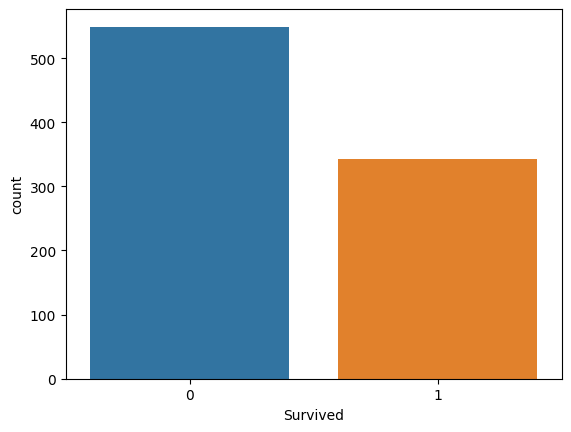

In [5]:
qtd = df_dataset['Survived'].value_counts()

display(qtd)

sns.countplot(x='Survived',data = df_dataset)
plt.show()

Conforme podemos ver, as classes não estão perfeitamente balanceadas. Portanto, quando formos usar esses dados para treinar métodos supervisionados, pode-se testar alguma técnica de balanceamento de classes, pois o modelo gerado pela maioira dos métodos de aprendizado supervisionado costuma ser tendencioso para as classes com maior número de amostras. 

## Quantas pessoas embarcaram em cada local?

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

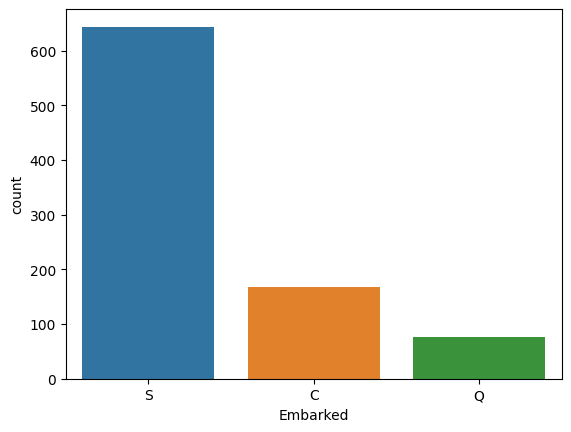

In [6]:
qtd = df_dataset['Embarked'].value_counts()

display(qtd)

sns.countplot(x='Embarked',data = df_dataset)
plt.show()

Além de ver a quantidade de pessoas usando o gráfico acima, podemos analisar diretamente no mapa.

In [7]:
import folium
from IPython.display import display


porto = ['Southampton', 'Cherbourg', 'Queenstown', ]
latitude = [50.90078149422455, 49.64370793309718, 51.85130663182286]
longitude = [-1.4139851888549873, -1.6152144167434825, -8.312334598574353]

#itapetininga -23.582703086015638, -48.03041367691033

mediaLatitude = np.mean( latitude )
mediaLongitude = np.mean( longitude )

#cria um mapa
map = folium.Map( location = [mediaLatitude,mediaLongitude], zoom_start = 6, control_scale=True)

for i in range(len(porto)):
    folium.Marker([latitude[i],longitude[i]],popup=porto[i]).add_to(map)
    folium.CircleMarker([latitude[i],longitude[i]], radius = qtd[i]/10, fill_color = 'yellow').add_to(map)

display(map)

## Pré-processamento: eliminação de atributos irrelevantes

Elimine os atributos irrelevantes.

In [8]:
print(df_dataset.columns)
df_dataset = df_dataset.drop(columns=['PassengerId','Name','Ticket','Cabin'])

display(df_dataset)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


## Pré-processamento: tratamento de atributos com valores ausentes

Outro passo importante, é verificar se existem atributos com valores ausentes (*NaN*) na base de dados.

In [9]:
#encontra as linhas com valores nulos
idxRowNan = pd.isnull( df_dataset ).any(axis=1).to_numpy().nonzero()

display( df_dataset.iloc[idxRowNan] )

print(df_dataset.shape)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,male,NaN,0,0,8.4583,Q
17,1,2,male,NaN,0,0,13.0000,S
19,1,3,female,NaN,0,0,7.2250,C
26,0,3,male,NaN,0,0,7.2250,C
28,1,3,female,NaN,0,0,7.8792,Q
...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C
863,0,3,female,NaN,8,2,69.5500,S
868,0,3,male,NaN,0,0,9.5000,S
878,0,3,male,NaN,0,0,7.8958,S


(891, 8)


Existem diversas técnicas para tratar atributos faltantes. Por exemplo, iremos preencher os valores ausentes com a média dos valores conhecidos. Mas, é importante enfatizar que essa não é a melhor técnica e não é apropriada para todos os casos.

In [10]:
# Substitui os valores faltantes pela média dos outros valores do mesmo atributo
# de amostras que sejam da mesma classe

def trataFaltantes( df_dataset ):
      
    df_notNull = df_dataset.loc[ ~pd.isnull(df_dataset['Age']),: ]
    
    media_c1 = df_dataset[ df_dataset['Survived']==1 ]['Age'].mean()
    media_c0 = df_dataset[ df_dataset['Survived']==0 ]['Age'].mean()
    
    # modifica apenas as linhas que contem nulo
    df_dataset.loc[ pd.isnull(df_dataset['Age']) & df_dataset['Survived']==1, 'Age'] = media_c1
    df_dataset.loc[ pd.isnull(df_dataset['Age']) & df_dataset['Survived']==0, 'Age'] = media_c0
    
    return df_dataset

df_dataset = trataFaltantes( df_dataset )
    
# imprime apenas as linhas que antes possuiam valores NaN
print('\nAmostras que possuiam valores faltantes:')
display(df_dataset.iloc[idxRowNan])


Amostras que possuiam valores faltantes:


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,male,30.626179,0,0,8.4583,Q
17,1,2,male,30.626179,0,0,13.0000,S
19,1,3,female,30.626179,0,0,7.2250,C
26,0,3,male,30.626179,0,0,7.2250,C
28,1,3,female,30.626179,0,0,7.8792,Q
...,...,...,...,...,...,...,...,...
859,0,3,male,30.626179,0,0,7.2292,C
863,0,3,female,30.626179,8,2,69.5500,S
868,0,3,male,30.626179,0,0,9.5000,S
878,0,3,male,30.626179,0,0,7.8958,S


## Conversão de dados

Se um atributo possui mais de dois valores categóricos, use one-hot-encoding. Se ele possui apenas dois possíveis valores, basta convertê-los em binário. Converter atributos binários em one-hot-encoding causa um problema conhecido como "*dummy variable trap*", onde os dois atributos gerados são multicolineares (100% correlacionados).

Vamos converter sexo para binário. 

In [11]:
df_dataset['Sex'] = df_dataset['Sex'].replace('male',0)
df_dataset['Sex'] = df_dataset['Sex'].replace('female',1)
display(df_dataset)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,30.626179,1,0,7.2500,S
1,1,1,1,30.626179,1,0,71.2833,C
2,1,3,1,30.626179,0,0,7.9250,S
3,1,1,1,30.626179,1,0,53.1000,S
4,0,3,0,30.626179,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,0,30.626179,0,0,13.0000,S
887,1,1,1,30.626179,0,0,30.0000,S
888,0,3,1,30.626179,1,2,23.4500,S
889,1,1,0,30.626179,0,0,30.0000,C


Vamos aplicar one-hot-encoding no atributo no atributo **Embarked**. 

In [74]:
if "Embarked" in df_dataset.columns:
    df_dataset = pd.get_dummies(df_dataset, columns=["Embarked"], dtype=int)

display(df_dataset)
print(df_dataset.dtypes)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,0.827377,0,0.0,0.432793,-0.473674,-0.502445,False,False,True
1,1,-1.566107,1,0.0,0.432793,-0.473674,0.786845,True,False,False
2,1,0.827377,1,0.0,-0.474545,-0.473674,-0.488854,False,False,True
3,1,-1.566107,1,0.0,0.432793,-0.473674,0.420730,False,False,True
4,0,0.827377,0,0.0,-0.474545,-0.473674,-0.486337,False,False,True
...,...,...,...,...,...,...,...,...,...,...
886,0,-0.369365,0,0.0,-0.474545,-0.473674,-0.386671,False,False,True
887,1,-1.566107,1,0.0,-0.474545,-0.473674,-0.044381,False,False,True
888,0,0.827377,1,0.0,0.432793,2.008933,-0.176263,False,False,True
889,1,-1.566107,0,0.0,-0.474545,-0.473674,-0.044381,True,False,False


Survived        int64
Pclass        float64
Sex             int64
Age           float64
SibSp         float64
Parch         float64
Fare          float64
Embarked_C       bool
Embarked_Q       bool
Embarked_S       bool
dtype: object


Vamos gerar algumas estatísticas sobre a base de dados.

A função `describe()` da `Pandas` sumariza as principais estatísticas sobre os dados de um _data frame_, como a média, o desvio padrão, valor máximo, valor mínimo e alguns percentis.


In [58]:
#apresenta as principais estatisticas do dataframe
df_detalhes = df_dataset.describe()

display(df_detalhes)

print(df_dataset.info())

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,8.910000e+02,891.000000,891.0,8.910000e+02,8.910000e+02,8.910000e+02
mean,0.383838,4.386066e-17,0.352413,0.0,1.594933e-17,5.283216e-17,3.987333e-18
std,0.486592,1.000562e+00,0.477990,0.0,1.000562e+00,1.000562e+00,1.000562e+00
min,0.000000,-1.566107e+00,0.000000,0.0,-4.745452e-01,-4.736736e-01,-6.484217e-01
25%,0.000000,-3.693648e-01,0.000000,0.0,-4.745452e-01,-4.736736e-01,-4.891482e-01
50%,0.000000,8.273772e-01,0.000000,0.0,-4.745452e-01,-4.736736e-01,-3.573909e-01
75%,1.000000,8.273772e-01,1.000000,0.0,4.327934e-01,-4.736736e-01,-2.424635e-02
max,1.000000,8.273772e-01,1.000000,0.0,6.784163e+00,6.974147e+00,9.667167e+00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    float64
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    float64
 5   Parch       891 non-null    float64
 6   Fare        891 non-null    float64
 7   Embarked_C  891 non-null    bool   
 8   Embarked_Q  891 non-null    bool   
 9   Embarked_S  891 non-null    bool   
dtypes: bool(3), float64(5), int64(2)
memory usage: 51.5 KB
None


## Normalização dos atributos

A escala de alguns atributos é diferente, o que pode prejudicar alguns métodos de aprendizado de máquina. Portanto, vamos normalizar os valores dos atributos para que fiquem com média igual a zero e desvio padrão igual a um. Usando a biblioteca *scikit-learn*, poderíamos fazer a normalização usando a função [*sklearn.preprocessing.StandardScaler*](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [59]:
import sklearn as skl
from sklearn import preprocessing

# usando o método fit da classe StandardScaler para treinar o modelo
# usando o método tranform para tranformar

colunas = ['Pclass','Age','SibSp','Parch','Fare']

#normaliza os valores dos atributos para que fiquem com media igual a zero e desvio padrão igual a um
scaler = skl.preprocessing.StandardScaler().fit(df_dataset[colunas])

#coloca os valores dos atributos na variável X
df_dataset[colunas] = scaler.transform(df_dataset[colunas])

Agora que os dados estão normalizados, vamos analisar as informações estatísticas novamente.

In [60]:
# apresenta as principais estatísticas da base de dados
df_detalhes = df_dataset.describe()

display(df_detalhes.round(8))

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.0,891.000000,891.000000,891.000000
mean,0.383838,-0.000000,0.352413,0.0,0.000000,0.000000,0.000000
std,0.486592,1.000562,0.477990,0.0,1.000562,1.000562,1.000562
min,0.000000,-1.566107,0.000000,0.0,-0.474545,-0.473674,-0.648422
25%,0.000000,-0.369365,0.000000,0.0,-0.474545,-0.473674,-0.489148
50%,0.000000,0.827377,0.000000,0.0,-0.474545,-0.473674,-0.357391
75%,1.000000,0.827377,1.000000,0.0,0.432793,-0.473674,-0.024246
max,1.000000,0.827377,1.000000,0.0,6.784163,6.974147,9.667167


## Distribuição dos dados e detecção de outliers

Outro passo importante na análise dos dados é a detecção de outliers (*i.e.*, dados resultados de leituras incorretas, erros de digitação, etc). 

Uma das maneiras mais simples de verificar se os dados contém outliers é criar um gráfico box plot de cada atributo. Para isso, podemos usar a função `boxplot` da biblioteca `Pandas`.

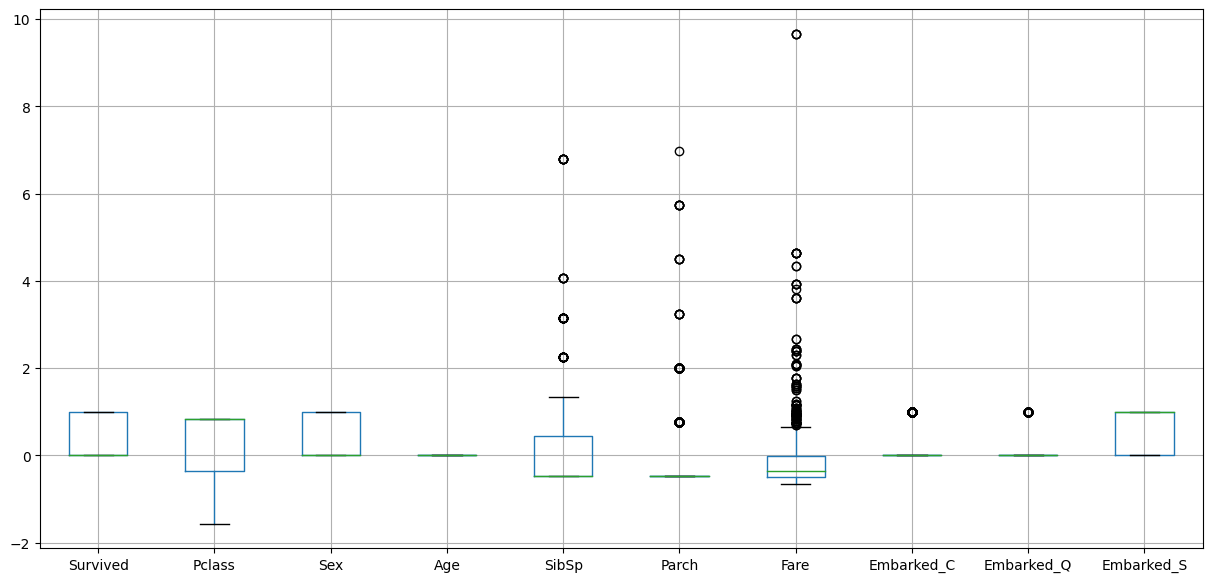

In [61]:
#Usa o método boxplot do pandas para obter o boxplot de cada atributo
# Para conseguir aumentar a imagem, use o parâmetro figsize=(x,y)

# apresenta as principais estatísticas sobre a base de dados
df_dataset.boxplot(figsize=(15,7))

plt.show() #usa o método show para garantir que o gráfico será plotado

Outra forma de analisar se a base de dados contém outliers é usar gráficos de dispersão a partir dos _dataframes_ é usando a biblioteca `Seaborn`. Juntamente com essa biblioteca, também é recomendável importar a biblioteca `Matplotlib` para personalizar os gráficos. 

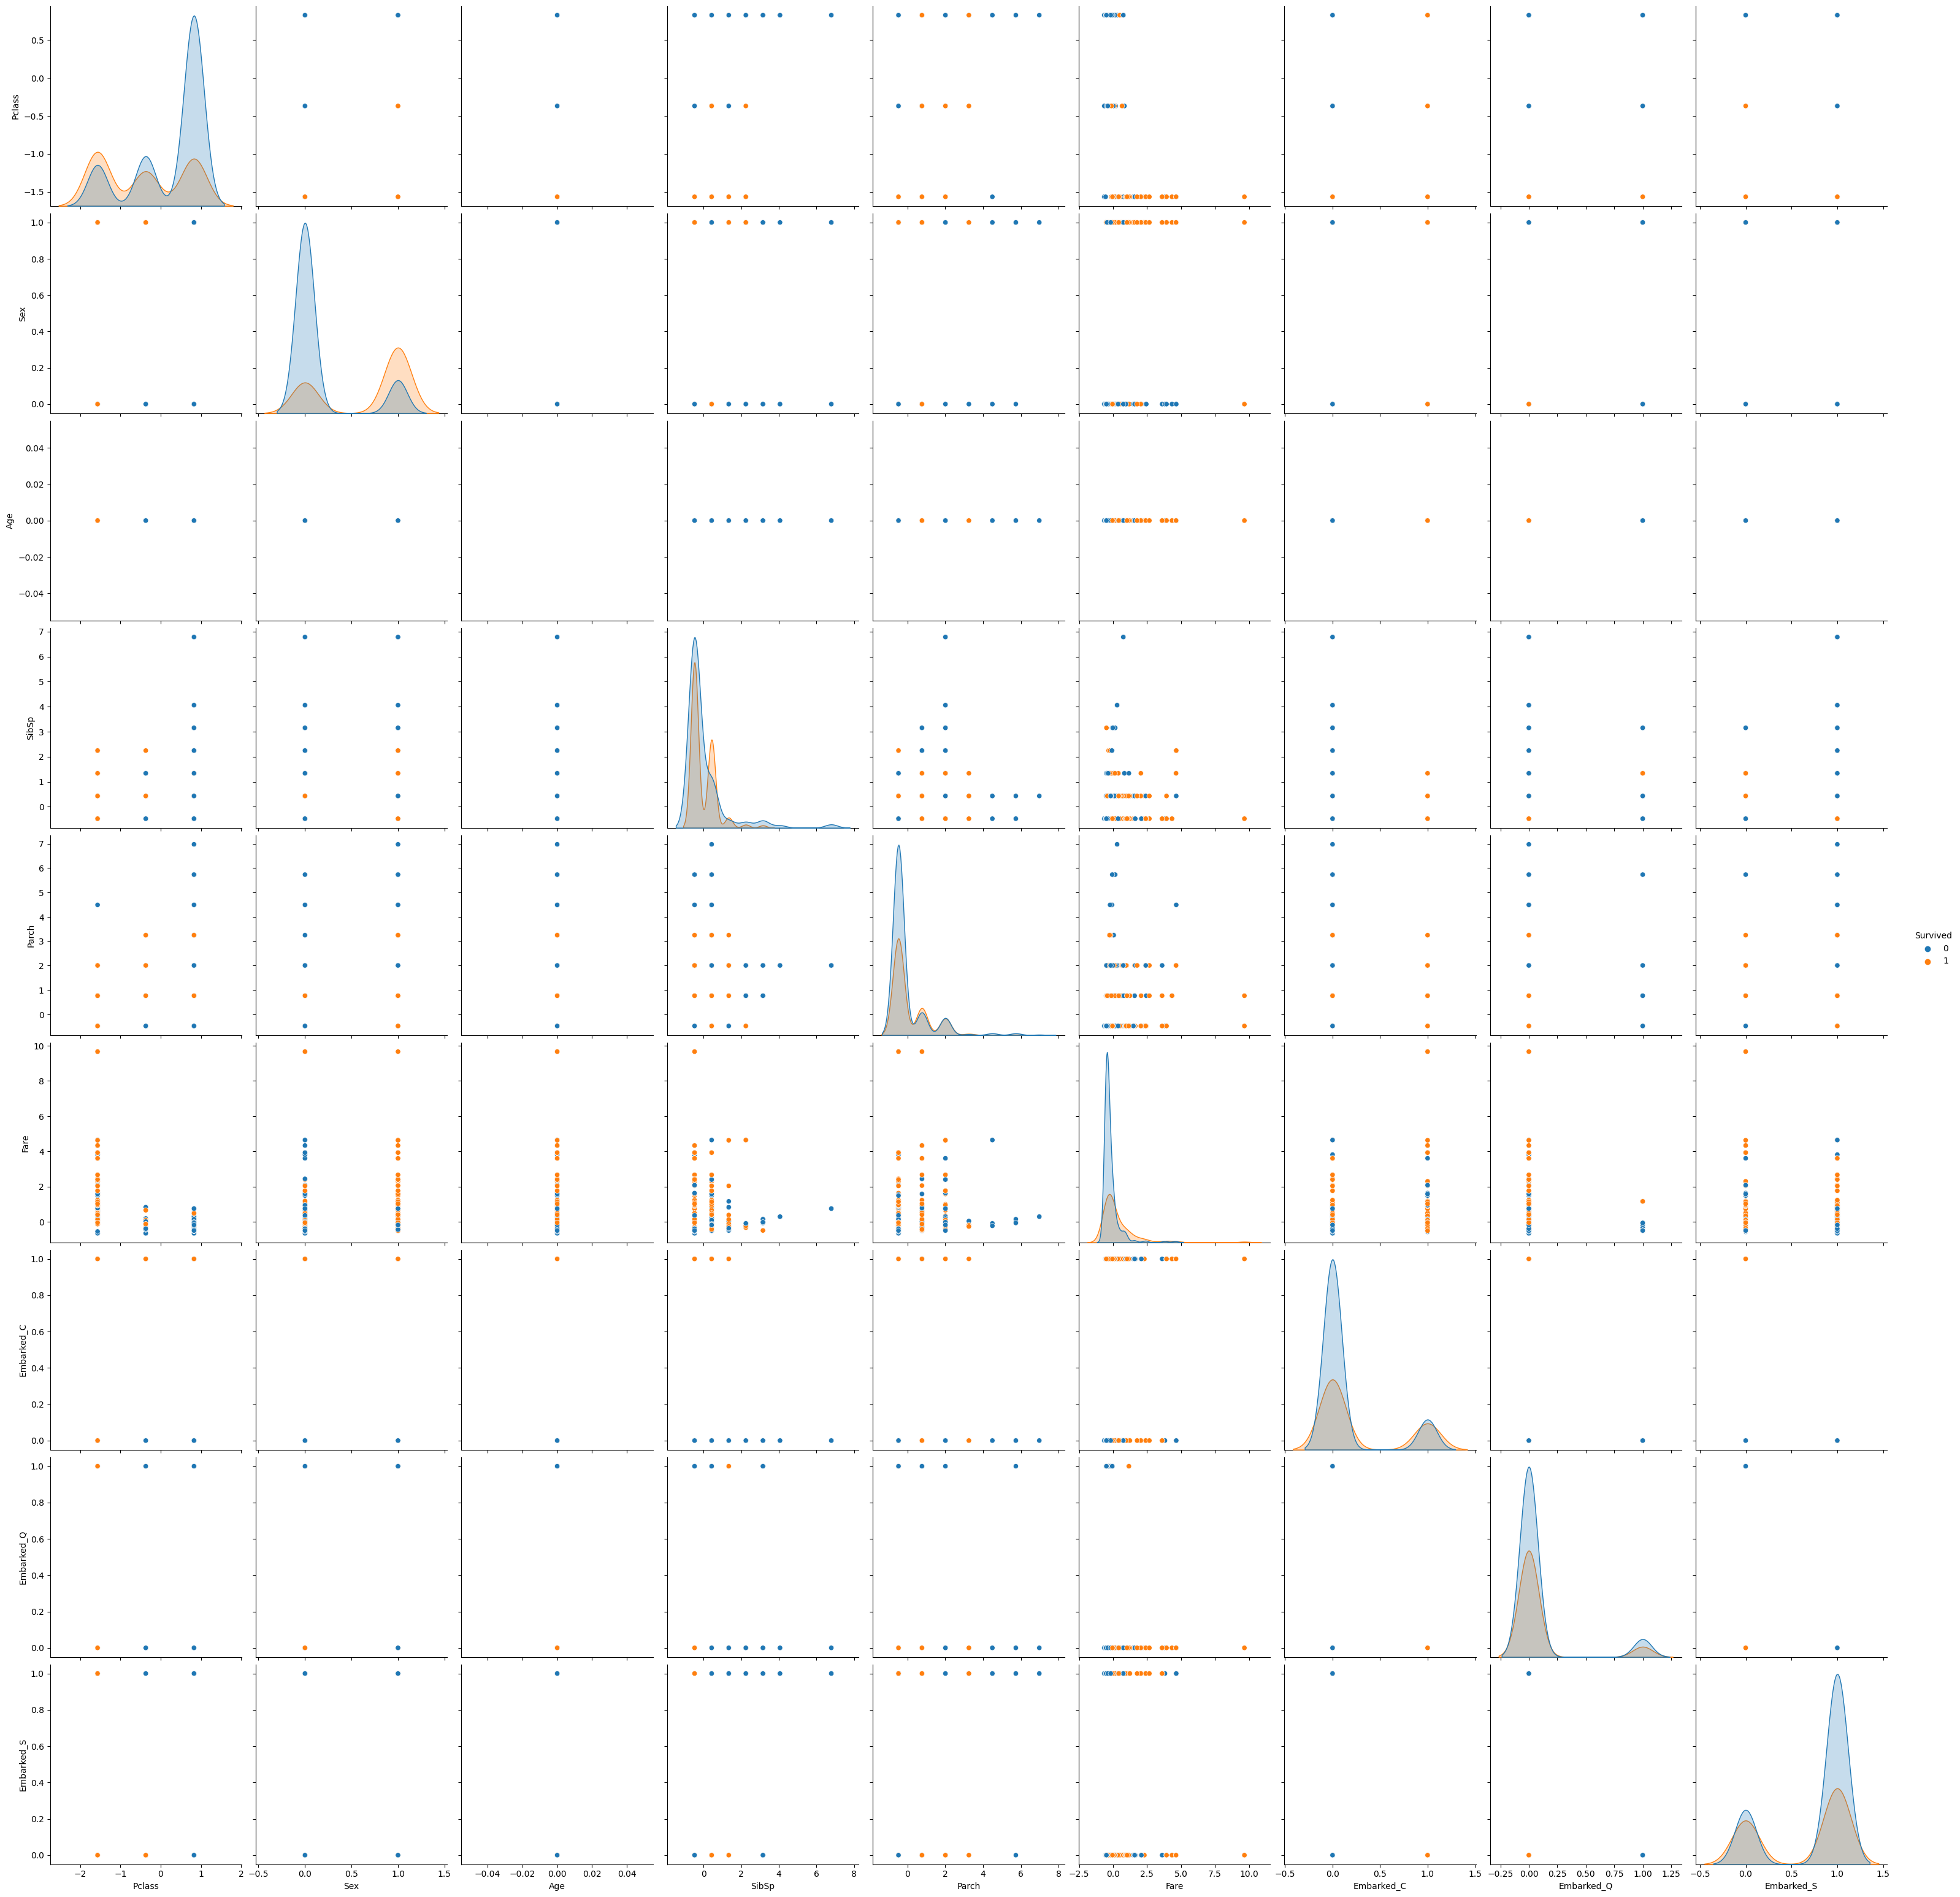

In [62]:
# Use a função pairplot da biblioteca seaborn para plotar uma matriz
# de dispersão dos atributos. 
# Use o parâmetro hue para informar o coluna que contém a classe da 
# base de dados. Use o parâmetro height para informar o tamanho do gráfico.

# dataframe como parâmetro. 
# Para conseguir aumentar a imagem, use o parâmetro figsize=(x,y)

# matriz de gráficos scatter 
sns.pairplot(df_dataset, hue='Survived', height=3.5);


# usa o método show para garantir que o gráfico será plotado
plt.show()

Outra alternativa, é usar a biblioteca `plotly`.

In [63]:
# Use a função scatter_matrix da biblioteca plotly.express para plotar uma matriz
# de dispersão dos atributos. 
# Use o parâmetro color para informar o coluna que contém a classe.
# Use o parâmetro height para informar o tamanho do gráfico.
# Use o parâmetro dimensão, caso queira selecionar apenas algumas colunas

print(df_dataset.columns)

fig = px.scatter_matrix(df_dataset, color="Survived", height=1000,
                       dimensions=['SibSp', 'Parch', 'Age', 'Fare'])

# controla o tamanho do marcador
fig.update_traces(marker=dict(size=4))

# controla o tamanho da fonte
fig.update_layout(font=dict(size=8))

# usa o método show para garantir que o gráfico será plotado
fig.show()

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


Vamos usar a função `lmplot` da biblioteca `Seaborn`para visualizar a combinação de dois atributos.

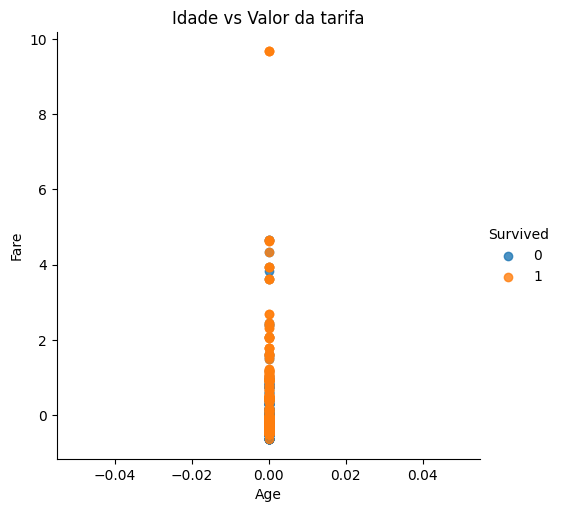

In [64]:
# Use a função scatter_matrix da biblioteca plotly.express para plotar 
# o gráfico de dispersão dos atributos. 
# O parâmetro x determina o atributo do eixo x, enquanto o parâmetro
# y determina o atributo do eixo y.
# Informe a variável que contém a base de dados no parâmetro data
# O parâmetro hue deve receber a coluna que contém a classe
# Use o valor False no parâmetro fit_reg para que não seja gerada
# nenhuma linha de regressão

# Scatter plot
sns.lmplot(x='Age', y='Fare', data=df_dataset,
            fit_reg=False, #sem linha de regressão
            hue='Survived' #Cor para cada estágio evoluído
           )

# cria um título para o gráfico
plt.title('Idade vs Valor da tarifa')

# mostra o gráfico
plt.show()

A bilioteca `Seaborn` permite criar gráficos boxplot agrupados por um determinado atributo, o que facilita a análise dos dados. No exemplo abaixo, criaremos boxplots para cada atributo agrupados pela classe.

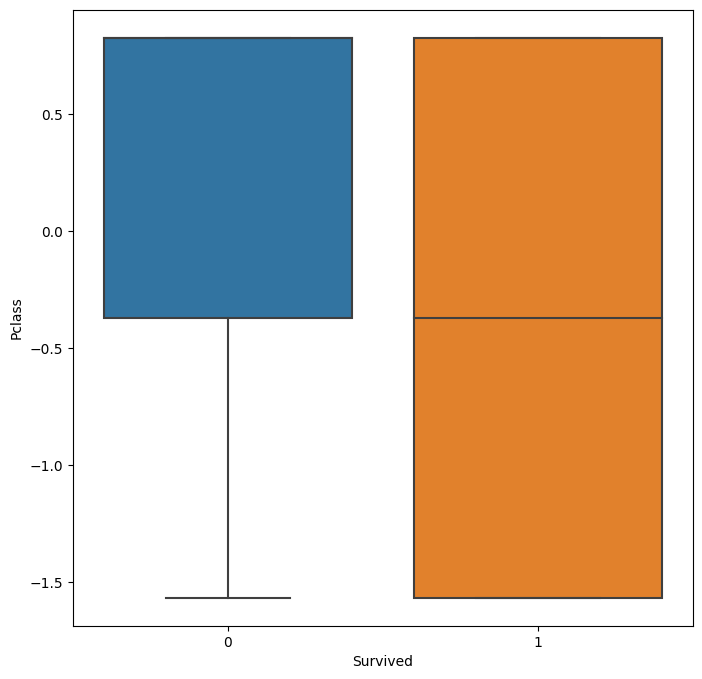

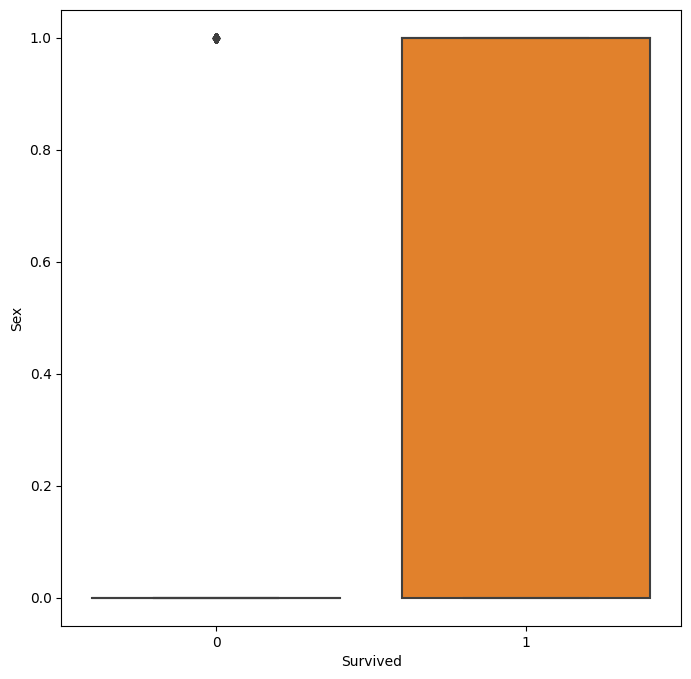

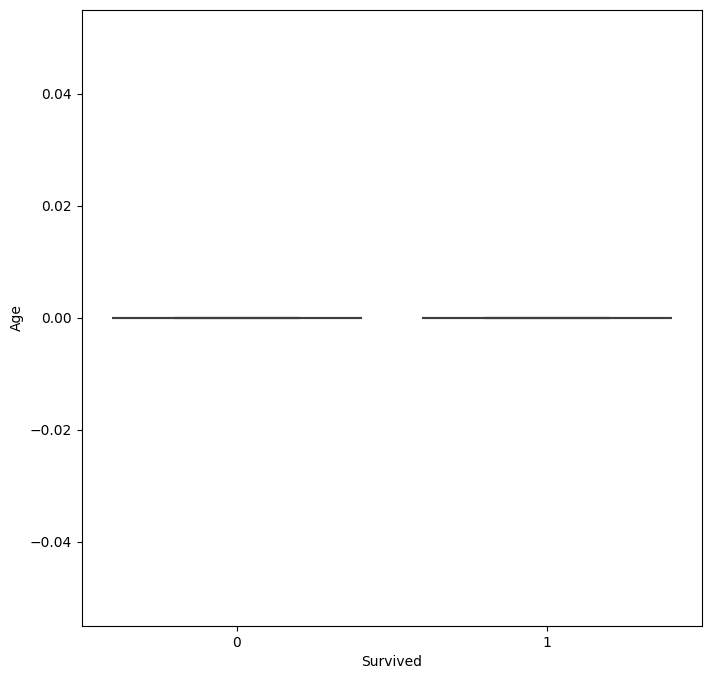

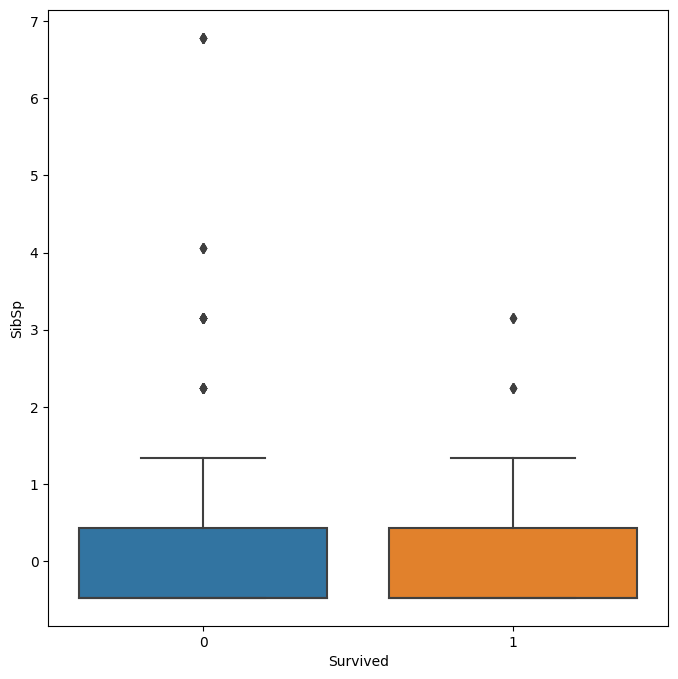

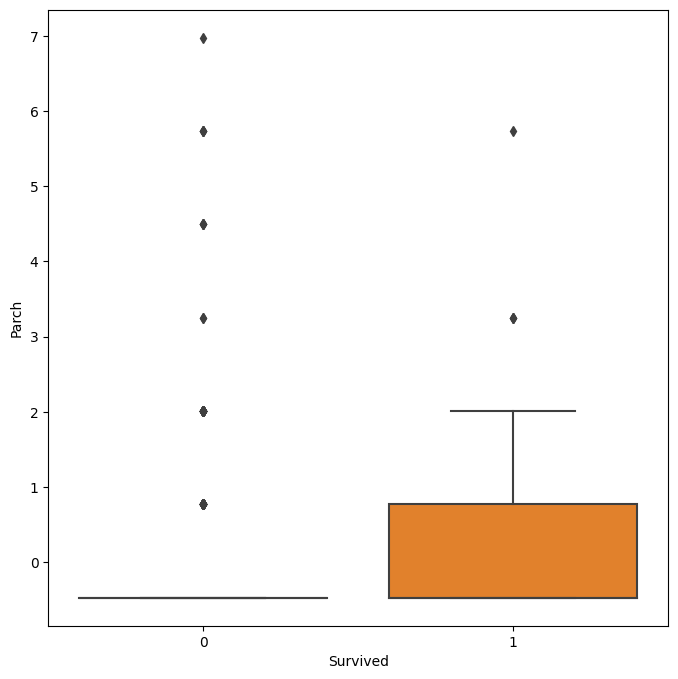

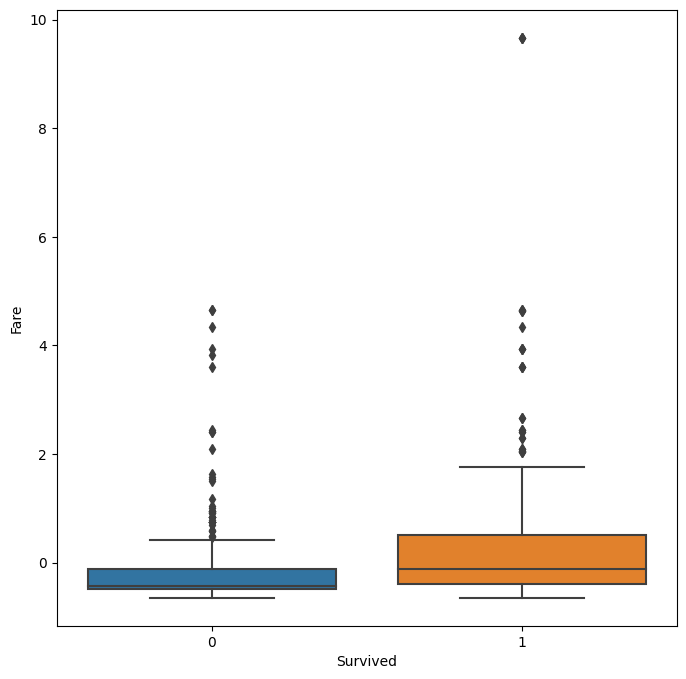

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

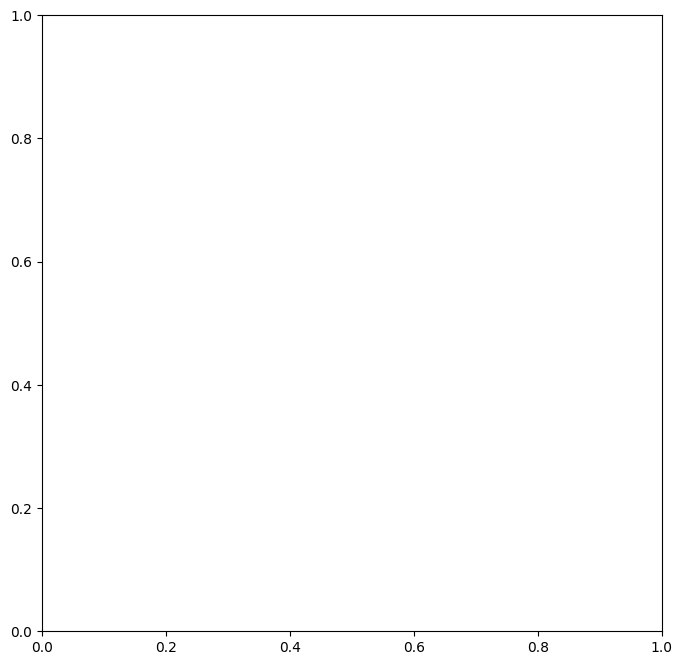

In [65]:
for atributo in df_dataset.columns[1:]:
    
    # define a dimensão do gráfico
    plt.figure(figsize=(8,8))
    
    ################# COMPLETE O CÓDIGO AQUI  #################
    # Use a função boxplot da biblioteca seaborn.
    # O parâmetro x deve receber o nome da coluna que contém classe
    # O parâmetro y deve recer o nome da coluna que contém o atributo 
    # O parâmetro data deve receber a base de dados

    # cria o boxplot
    sns.boxplot(x="Survived", y=atributo, data=df_dataset,whis=1.5)

    ##########################################################
    
    #mostra o gráfico
    plt.show()

Outro tipo de gráfico que ajuda a detectar outliers é o histograma. Portanto, vamos usá-lo para analisar cada atributo.

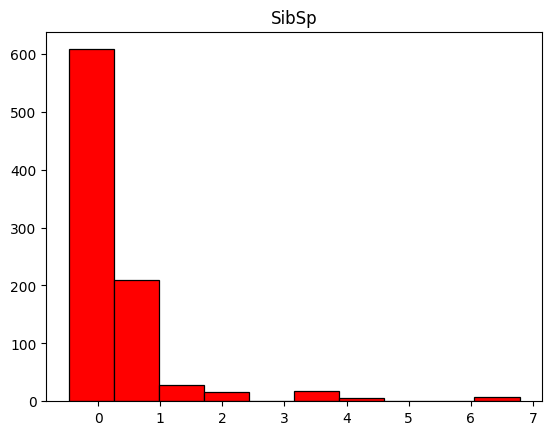

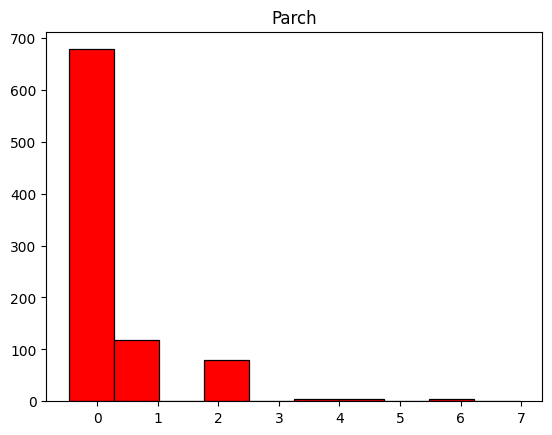

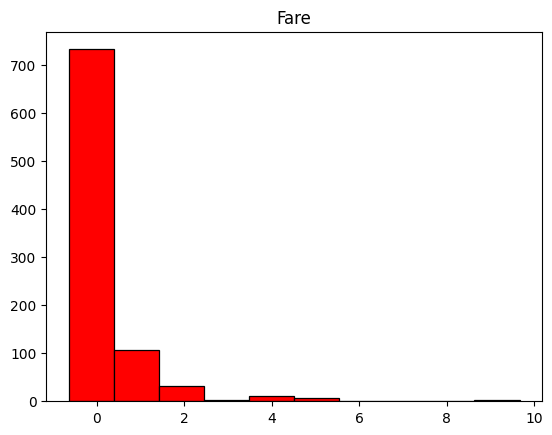

In [75]:
colunas = ['SibSp', 'Parch', 'Fare']

for atributo in colunas:
 
    # Use a função hist da biblioteca matplotlib. Ela deve receber uma matriz numpy
    # com os dados
    # Use o parâmetro bins para informar a quantidade de intervalos
    # Use parâmetro color para informar a cor
    # Use o parâmetro edgecolor para informar a cor das bordas
    # Use o parâmetro linewidth para informar a largura das linhas das bordas    
    # Dê um título a cada gráfico por meio da função title da matplotlib
    
    # cria o histograma
    n, bins, patches = plt.hist(df_dataset[atributo].values,bins=10, color='red', edgecolor='black', linewidth=0.9)

    # cria um título para o gráfico
    plt.title(atributo)
    
    ##########################################################

    #mostra o gráfico
    plt.show()

Agora, vamos usar um gráfico de densidade para fazer o mesmo tipo de análise.

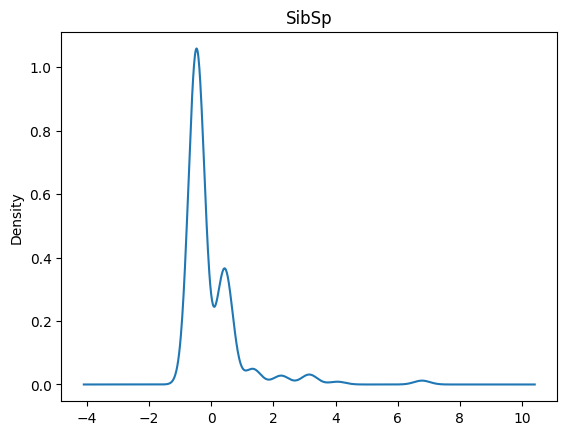

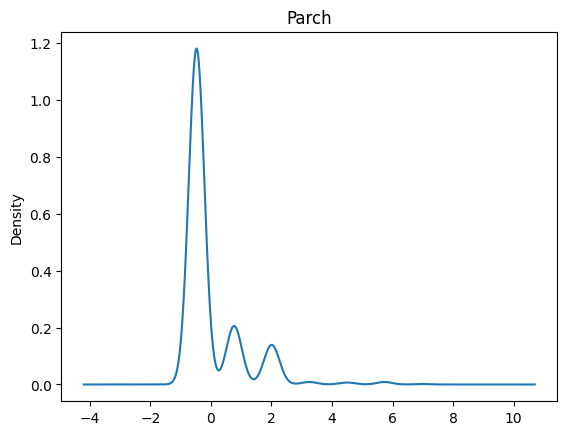

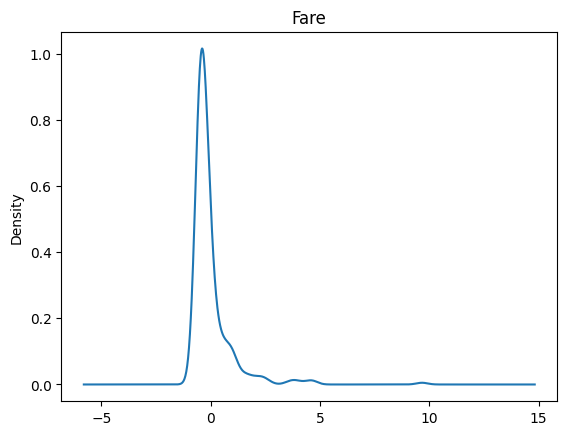

In [76]:
colunas = ['SibSp', 'Parch', 'Fare']
for atributo in colunas:

    # Para cada atributo do dataframe, use o método plot para 
    # plotar o gráfico de densidade. 
    #
    # Use o parâmetro kind com o valor 'density' para informar que o 
    # gráfico deve ser de densidade
    #
    # Dê um título a cada gráfico por meio da função title da matplotlib
    
    # criando o gráfico de densidade para cada atributo
    densityplot = df_dataset[atributo].plot(kind='density')
    
    # cria um título para o gráfico
    plt.title(atributo)
    

    #mostra o gráfico
    plt.show()

## Correlação entre os atributos

Quando dois atributos possuem valores idênticos ou muito semelhantes para todas as amostras, um deles deve ser eliminado ou eles devem ser combinados. Isso ajuda a diminuir o custo computacional das tarefas de aprendizado e evita que o aprendizado de alguns método seja prejudicado, principalmente os métodos baseados em otimização.

Uma das maneiras mais comuns de analisar a correlação dos dados é através das matrizes de correlação e covariância. Podemos fazer isso usando a biblioteca `Numpy` ou a `Pandas`.

In [77]:
df_dataset = df_dataset[colunas]

# criando uma matriz X com os valores do data frame
X = df_dataset.iloc[:,:-1].values

# Use a função cov da numpy para calcular a covariância. Você deve
# passar a matriz transposta para essa função
# Use a função corrcoef da numpy para calcular a correlação.

# matriz de covariancia
covariance = np.cov(X.T)

# matriz de correlação
correlation = np.corrcoef(X, rowvar=False)

##########################################################

print('Matriz de covariância: ')
display(covariance)

print('\n\nMatriz de correlação: ')
display(correlation)

Matriz de covariância: 


array([[1.0011236 , 0.41530381],
       [0.41530381, 1.0011236 ]])



Matriz de correlação: 


array([[1.       , 0.4148377],
       [0.4148377, 1.       ]])

Agora, vamos calcular as matrizes de correlação e covariância usando a `Pandas`.

In [78]:
# Use o método cov para obter a covariância. 
# Use o método corr para obter a correlação.

# matriz de covariancia
df_covariance = df_dataset.cov()

# matriz de correlação
df_correlation = df_dataset.corr()


print('Matriz de covariância: ')
display(df_covariance)

print('\n\nMatriz de correlação: ')
display(df_correlation)

Matriz de covariância: 


,SibSp,Parch,Fare
SibSp,1.001124,0.415304,0.159830
Parch,0.415304,1.001124,0.216468
Fare,0.159830,0.216468,1.001124




Matriz de correlação: 


,SibSp,Parch,Fare
SibSp,1.000000,0.414838,0.159651
Parch,0.414838,1.000000,0.216225
Fare,0.159651,0.216225,1.000000


Podemos ver que nenhum dos os atributos possuem alta correlação. 

Para facilitar a visualização, vamos plotar a correlação usando mapas de cores.

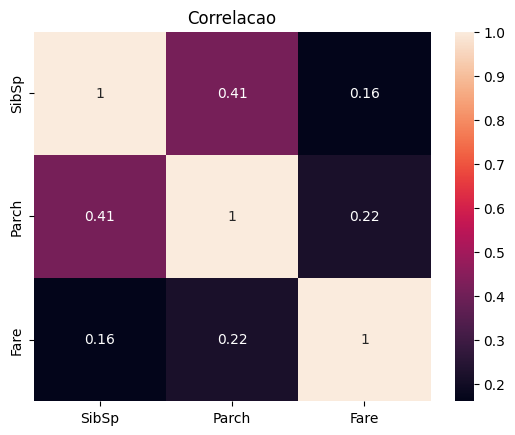

In [79]:
# Use o método heatmap da biblioteca seaborn para plotar
# a correlação calculada anteriormente
#
# Informe os nomes das colunas desejadas tanto no parâmetro
# xticklabels, quanto no yticklabels

# cria um mapa de cores dos valores da correlação
sns.heatmap(df_correlation, 
        xticklabels=df_correlation.columns,
        yticklabels=df_correlation.columns,
        annot = True)

##########################################################

plt.title('Correlacao')
plt.show()

É importante notar que a alta correlação entre dois atributos não significa que um deles influencia no valor do outro. Veja alguns exemplos que mostram isso em http://www.tylervigen.com/spurious-correlations

<img src="http://tylervigen.com/correlation_project/correlation_images/number-of-people-who-tripped-over-their-own-two-feet-and-died_number-of-lawyers-in-nevada.png" width="800" align="center"/>

<img src="http://tylervigen.com/correlation_project/correlation_images/works-of-visual-art-copyrighted-us_females-in-new-york-who-slipped-or-tripped-to-their-death.png" width="800" align="center"/>
